In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib
import glob


%matplotlib inline

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14,'font.family':'Arial','font.weight':'bold','figure.dpi':200})

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from IPython.display import display
from ipywidgets import *


def full(w,hideDes=False):
    for i in w.children:
        i.layout.width='100%'
        if hideDes:
            i.description = ''
    return w

def doIT(f,*args,**kwargs):
    display(full(interactive(f,*args,**kwargs)))

In [2]:
Path = r'\\SIVALAB\Users\Shared\SivaLabs\T2SL\IV\M6'
sname = Path.split('\\')[-1]

s = glob.glob(Path+r'\*.txt')
s = np.array(s)
#ind = [i for i in range(len(s)) if i not in [1,2]] 
#s = s[ind]
for i,j in enumerate(s):
    print i,j[j.rindex('\\')+1:]
    
Ifile = 0

0 M6 100 - I02-26-2018 140535.txt
1 M6 100 - II02-26-2018 141606.txt
2 M6 100 - II02-26-2018 142152.txt
3 M6 100 - III02-26-2018 143206.txt
4 M6 100 - IV02-26-2018 144027.txt
5 M6 300 - I02-26-2018 134544.txt
6 M6 300 - I02-26-2018 135714.txt
7 M6 300 - I02-26-2018 135927.txt
8 M6 300 - II02-26-2018 141137.txt
9 M6 300 - II02-26-2018 141319.txt
10 M6 300 - II02-26-2018 142701.txt
11 M6 300 - III02-26-2018 142939.txt
12 M6 300 - IV02-26-2018 144512.txt
13 M6 300 - IV02-26-2018 144744.txt
14 M6 300 - IV02-26-2018 144912.txt
15 M6 50 - I02-26-2018 140808.txt
16 M6 50 - II02-26-2018 142356.txt
17 M6 50 - III02-26-2018 143406.txt
18 M6 50 - IV02-26-2018 143658.txt


In [3]:
print(sname)

M6


In [33]:
data = [pd.read_table(i,delimiter='\t') for i in s]
X    = [int(j[j.rindex('\\')+1:].split()[1]) for j in s]
sortInd = np.argsort(X)
data = [data[i] for i in sortInd]
X = [X[i] for i in sortInd]
s = [s[i] for i in sortInd]

In [5]:
print(data[0].keys())

Index([u'UniqueID', u'Current_(A)', u'Voltage_(V)', u'Unique_ID', u'Date-Time',
       u'Sample_Name', u'Bake', u'Diode_Name', u'Area_(cm2)',
       u'Diode_Pitch_(um)', u'Implant_Gap_(um)', u'Implant_Type',
       u'Temperature_(K)', u'TemperatureB_(K)', u'Illumination',
       u'Curve_Shape', u'Curve_Shape Notes', u'|J|_Min', u'V(Jmin)',
       u'R(Jmin)A', u'I(-100)', u'R(-100)A', u'I(-50)', u'R(-50)A', u'I(-20)',
       u'R(-20)A', u'R0A', u'R(+50)A', u'Ideality Factor',
       u'Saturation Current Density', u'Series Resistance', u'Notes'],
      dtype='object')


In [6]:
sizes = []
for d in data:
    try:
        if d['Diode_Pitch_(um)'][0] not in sizes:
            sizes.append(d['Area_(cm2)'][0])
    except:
        pass
print(sizes)

[2.5000000000000001e-05, 2.5000000000000001e-05, 2.5000000000000001e-05, 2.5000000000000001e-05, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.00089999999999999998, 0.00089999999999999998, 0.00089999999999999998, 0.00089999999999999998, 7.8539820000000013e-09, 0.00089999999999999998, 0.00089999999999999998, 0.00089999999999999998, 0.00089999999999999998, 0.00089999999999999998]


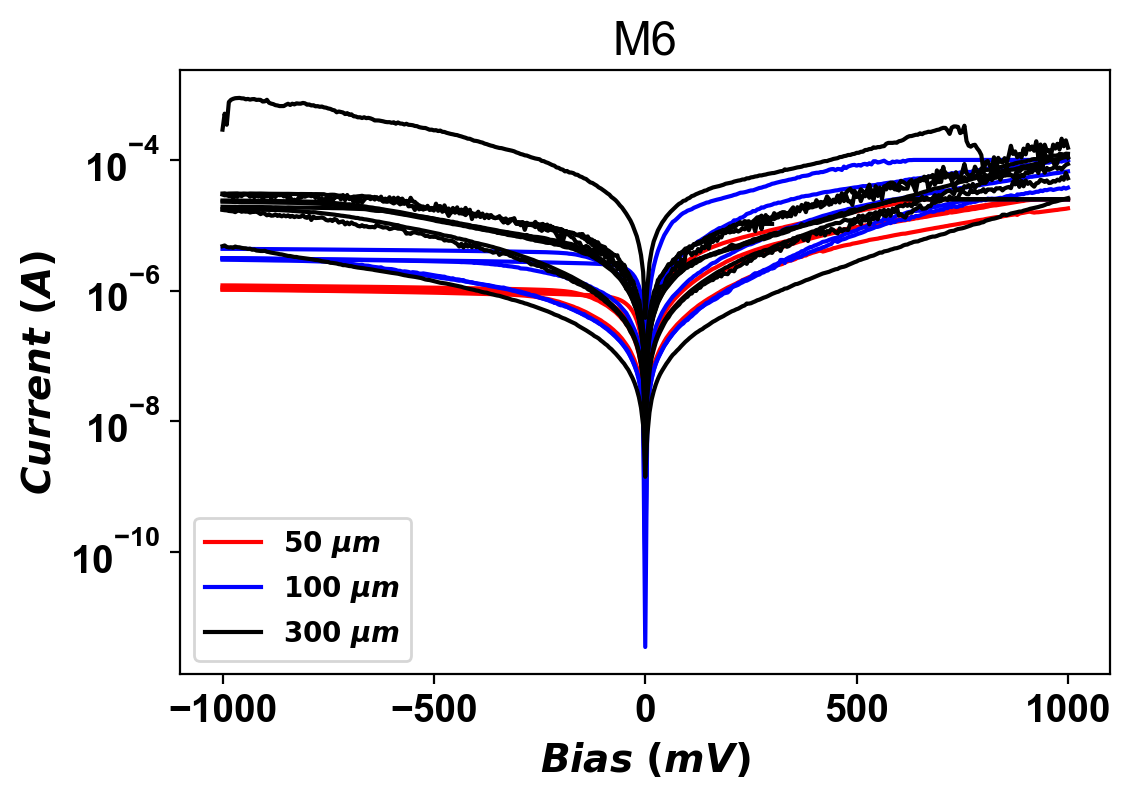

In [7]:
c = {50:'r',100:'b',300:'k',}
tC = {50:False,100:False,300:False}
for x,d in zip(X,data):
    try:
        I = np.array(d['Current_(A)']).astype(float)
        V = np.array(d['Voltage_(V)']).astype(float)
        if np.max(I)/(x*1E-4)**2<10:
                if tC[x]:
                    plt.semilogy(V*1E3,np.abs(I),c[x])
                else:
                    tC[x]=True
                    plt.semilogy(V*1E3,np.abs(I),c[x],label='$%s\ \mu m$'%x)
    except Exception as e:
        print e


plt.legend(loc='best',prop={'size':10})

plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$Current\ (A)$')
plt.title(sname)
#plt.xlim(-500,500)
#plt.ylim(1E-12,1E-3)

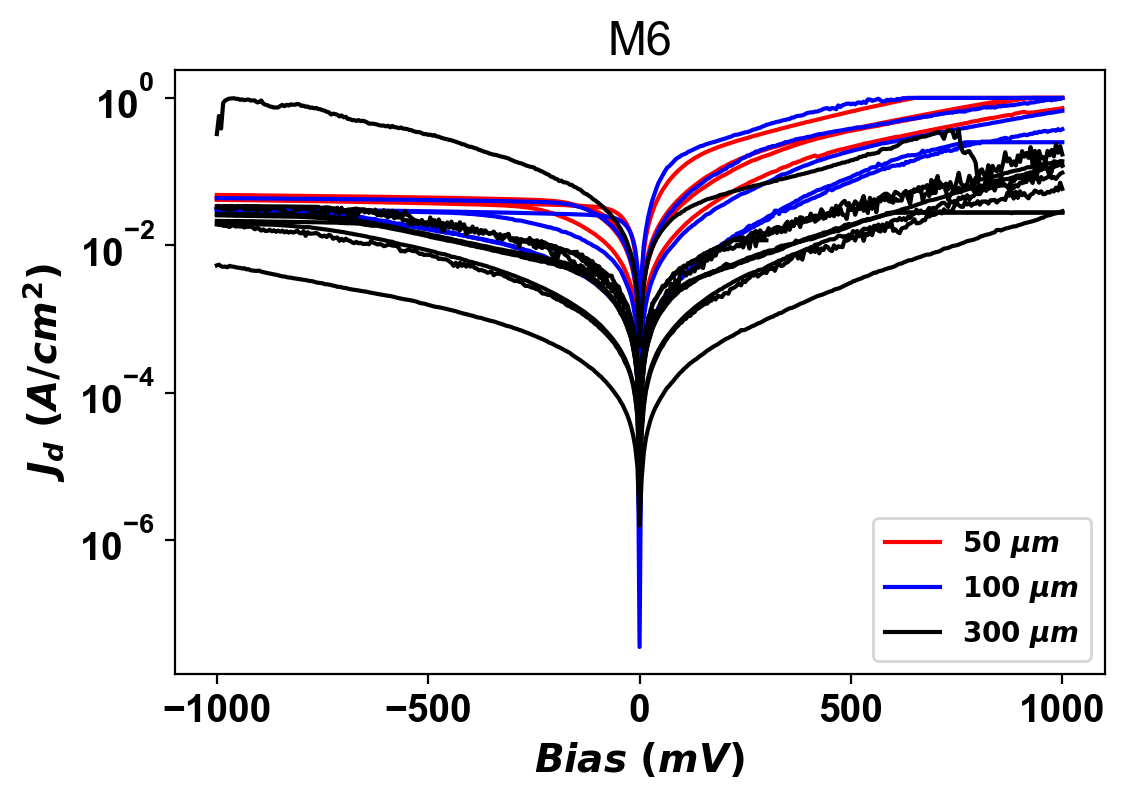

In [8]:
c = {50:'r',100:'b',300:'k',}
tC = {50:False,100:False,300:False}
for x,d in zip(X,data):
    try:
        I = np.array(d['Current_(A)']).astype(float)
        V = np.array(d['Voltage_(V)']).astype(float)
        if abs(I[90])/(x*1E-4)**2<10:
                if tC[x]:
                    plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,c[x])
                else:
                    tC[x]=True
                    plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,c[x],label='$%s\ \mu m$'%x)
    except Exception as e:
        print e


plt.legend(loc='best',prop={'size':10})

plt.legend(loc='lower right',prop={'size':10})
plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$J_{d}\ (A/cm^2)$')
plt.title(sname)
#plt.xlim(-500,500)
#plt.ylim(0,1E-1)

<h3>Curve Picker

In [9]:
def plotIV(i):
    x,d = X[i],data[i]
    c = {50:'r',100:'b',300:'k',}
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    plt.semilogy(V*1E3,np.abs(I),c[x])
    plt.title('i: %s'%i)
    plt.show()

doIT(plotIV,i=(0,len(data)-1))

Widget Javascript not detected.  It may not be installed or enabled properly.


In [34]:
for i,j in enumerate(s):
    print(i,j.split('\\')[-1])

(0, 'M6 50 - IV02-26-2018 143658.txt')
(1, 'M6 50 - II02-26-2018 142356.txt')
(2, 'M6 50 - I02-26-2018 140808.txt')
(3, 'M6 50 - III02-26-2018 143406.txt')
(4, 'M6 100 - I02-26-2018 140535.txt')
(5, 'M6 100 - III02-26-2018 143206.txt')
(6, 'M6 100 - II02-26-2018 142152.txt')
(7, 'M6 100 - II02-26-2018 141606.txt')
(8, 'M6 100 - IV02-26-2018 144027.txt')
(9, 'M6 300 - I02-26-2018 134544.txt')
(10, 'M6 300 - I02-26-2018 135714.txt')
(11, 'M6 300 - I02-26-2018 135927.txt')
(12, 'M6 300 - II02-26-2018 141137.txt')
(13, 'M6 300 - II02-26-2018 142701.txt')
(14, 'M6 300 - III02-26-2018 142939.txt')
(15, 'M6 300 - IV02-26-2018 144512.txt')
(16, 'M6 300 - IV02-26-2018 144744.txt')
(17, 'M6 300 - IV02-26-2018 144912.txt')
(18, 'M6 300 - II02-26-2018 141319.txt')


In [42]:
inds = [2,1,3,0,4,6,5,8,11,13,14,17] #[0,1,2,3,4,5,6,7,8,11,13,14,16,18]

(-1000, 1000)

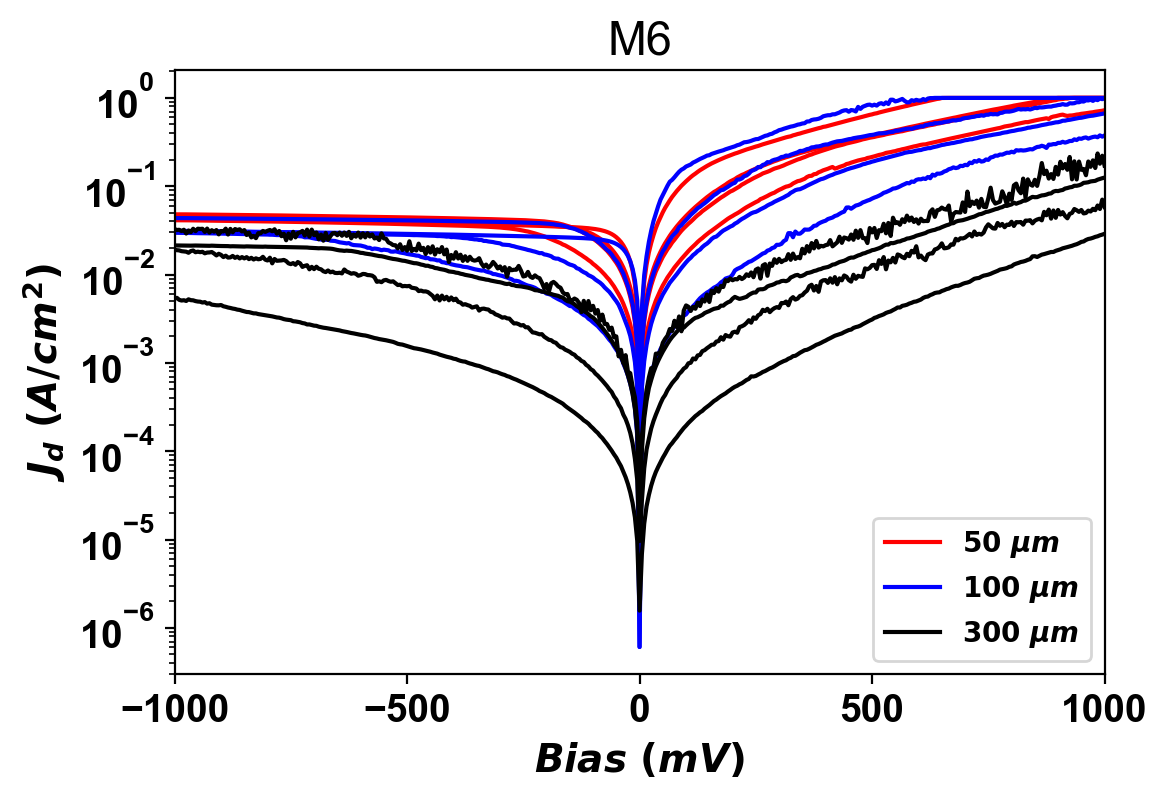

In [43]:
c = {50:'r',100:'b',300:'k',}
tC = {50:False,100:False,300:False}

cut = lambda a,indList:[a[i] for i in range(len(a)) if i in indList]

for x,d in zip(cut(X,inds),cut(data,inds)):
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    if tC[x]:
        plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,c[x])
    else:
        tC[x]=True
        plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,c[x],label='$%s\ \mu m$'%x)



plt.legend(loc='best',prop={'size':10})

plt.legend(loc='lower right',prop={'size':10})
plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$J_{d}\ (A/cm^2)$')
plt.title(sname)
plt.xlim(-1000,1000)
#plt.ylim(0,1E-1)

(-1000, 1000)

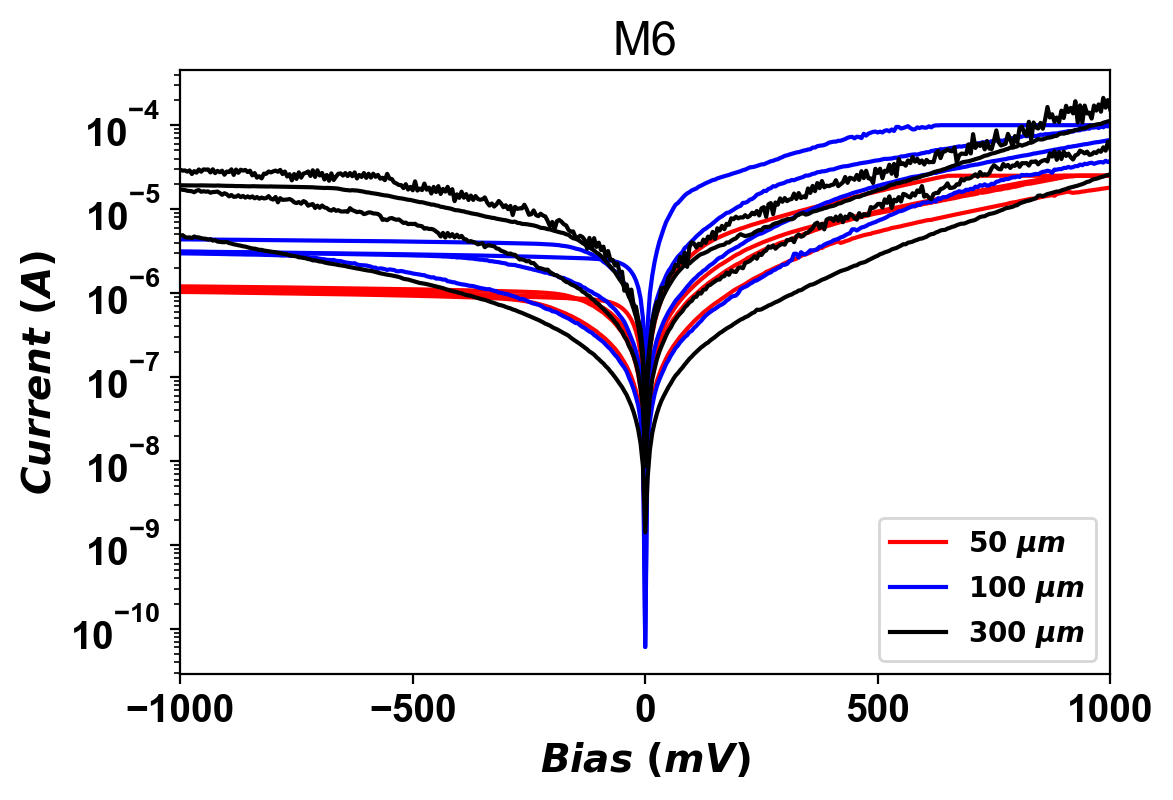

In [44]:
c = {50:'r',100:'b',300:'k',}
tC = {50:False,100:False,300:False}

cut = lambda a,indList:[a[i] for i in range(len(a)) if i in indList]

for x,d in zip(cut(X,inds),cut(data,inds)):
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    if tC[x]:
        plt.semilogy(V*1E3,np.abs(I),c[x])
    else:
        tC[x]=True
        plt.semilogy(V*1E3,np.abs(I),c[x],label='$%s\ \mu m$'%x)



plt.legend(loc='best',prop={'size':10})

plt.legend(loc='lower right',prop={'size':10})
plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$Current\ (A)$')
plt.title(sname)
plt.xlim(-1000,1000)
#plt.ylim(0,1E-1)

In [118]:
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter as sv

def getJ(d,x,v=-.1):
    f = interp1d(d['Voltage_(V)'],d['Current_(A)'],kind='cubic')
    return (f(v)/(x*1E-4)**2)


jd = np.array([abs(getJ(d,x)) for x,d in zip(X,data)])

for i,j in enumerate(jd[inds]):
    print(np.array(X)[inds][i],'%0.3e'%j)
print('%0.3e'%np.mean(jd[inds]),'%0.3e'%np.std(jd[inds]))

(50, '2.545e-02')
(50, '1.321e-02')
(50, '2.849e-02')
(50, '3.301e-02')
(100, '2.616e-02')
(100, '2.878e-03')
(100, '9.257e-03')
(100, '2.541e-02')
(300, '4.426e-03')
(300, '3.260e-03')
(300, '1.815e-04')
(300, '8.186e-04')
('1.438e-02', '1.189e-02')


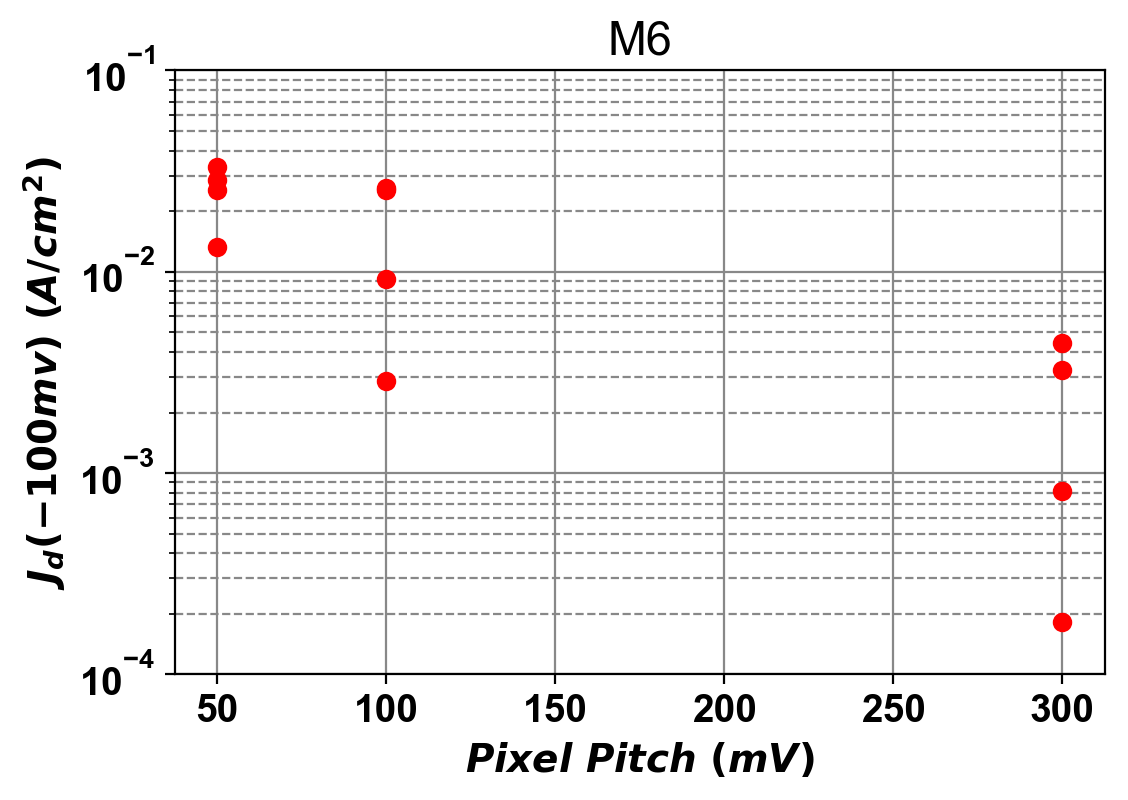

In [220]:
plt.semilogy(np.array(X)[inds],jd[inds],'ro')
#plt.plot(np.array(X)[inds],jd[inds]*1E3,'r.')
plt.xlabel('$Pixel\ Pitch\ (mV)$')
plt.ylabel('$J_{d}(-100mv)\ (A/cm^2)$')
plt.ylim(1E-4,1E-1)
plt.title(sname)
plt.grid(b=True, which='major', color='#888888', linestyle='-')
plt.grid(b=True, which='minor', color='#888888', linestyle='--')


np.savetxt(sname+'Jd-100mv.txt',np.array([np.array(X)[inds],jd[inds]]).transpose())

<h3>IV by Pixel Area</h3>

In [57]:
def plotJd(i):
    x,d = X[i],data[i]
    c = {50:'r',100:'b',300:'k',}
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,c[x])
    plt.ylim(1E-5,1E0)
    plt.title('%s i: %s'%(s[i].split('\\')[-1],i))
    plt.show()

doIT(plotJd,i=inds)

Widget Javascript not detected.  It may not be installed or enabled properly.


(0.0001, 1.0)

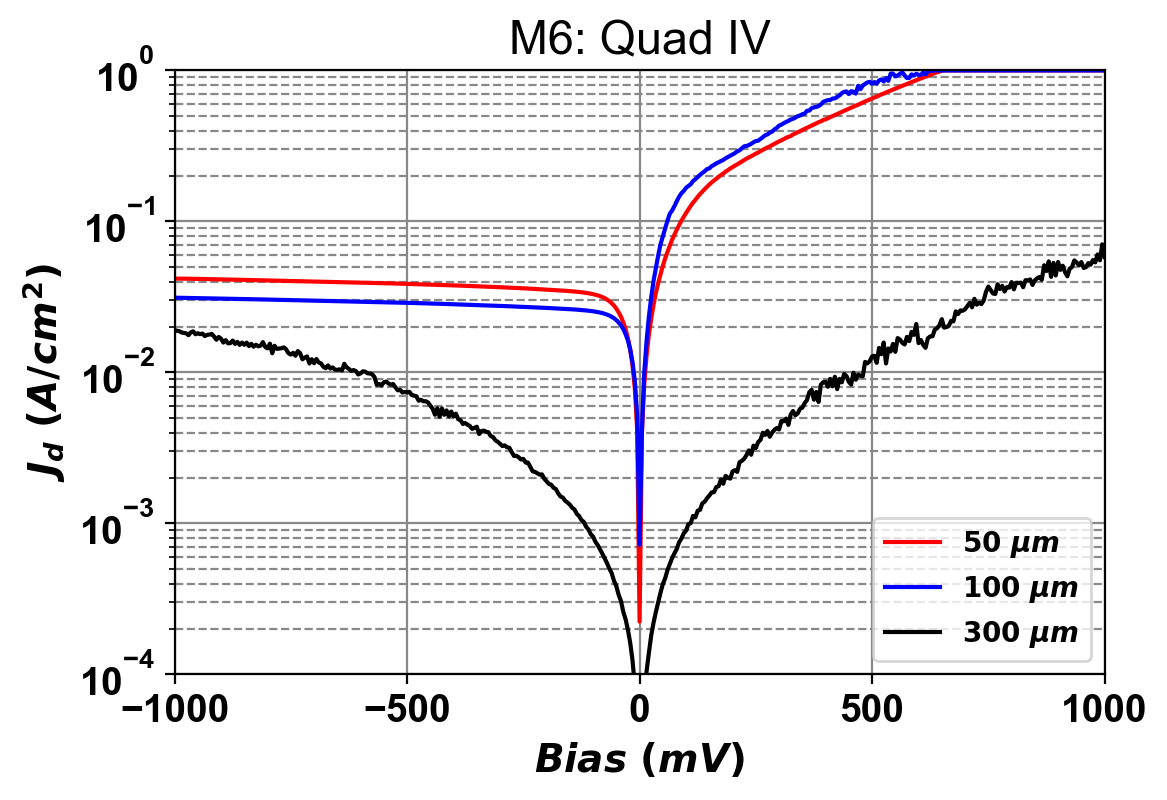

In [123]:
indI= [0,8,17]
#indI= [2,4,11]

c = {50:'r',100:'b',300:'k',}
tC = {50:False,100:False,300:False}

cut = lambda a,indList:[a[i] for i in range(len(a)) if i in indI]

for x,d in zip(cut(X,inds),cut(data,inds)):
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    if tC[x]:
        plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,c[x])
    else:
        tC[x]=True
        plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,c[x],label='$%s\ \mu m$'%x)

plt.grid(b=True, which='major', color='#888888', linestyle='-')
plt.grid(b=True, which='minor', color='#888888', linestyle='--')

plt.legend(loc='best',prop={'size':10})
plt.legend(loc='lower right',prop={'size':10})


plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$J_{d}\ (A/cm^2)$')
plt.title(sname+': Quad IV')
plt.xlim(-1000,1000)
plt.ylim(1E-4,1E0)
#plt.xlim(-1000,0)
#plt.semilogy([-1000,1000],[1E-2,1E-2],'k--')
#plt.ylim(0,1E-1)

I
III
II
IV


(0.0001, 1.0)

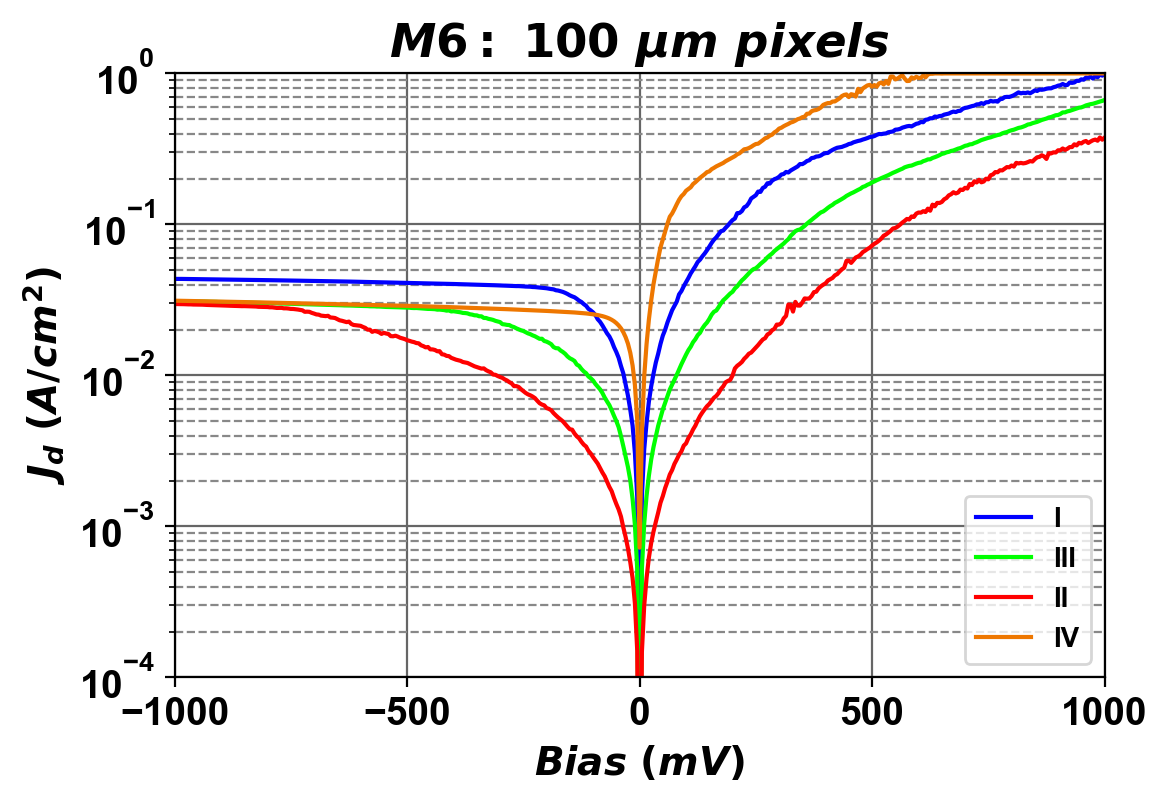

In [109]:
indI=[8,4,5,6]

cut = lambda a,indList:[a[i] for i in range(len(a)) if i in indI]
cdic = {'I':'#0000FF','II':'#FF0000','III':'#00FF00','IV':'#EE7700'}

for x,d,fname in zip(cut(X,inds),cut(data,inds),cut(s,inds),):
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    quad = fname.split('\\')[-1].split(' ')[3].split('0')[0]
    plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,color=cdic[quad],label=quad)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#888888', linestyle='--')

plt.legend(loc='best',prop={'size':10})
plt.legend(loc='lower right',prop={'size':10})


plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$J_{d}\ (A/cm^2)$')
plt.title('$%s:\ 100\ \mu m\ pixels$'%sname)
plt.xlim(-1000,1000)
plt.ylim(1E-4,1E0)
#plt.xlim(-1000,0)
#plt.semilogy([-1000,1000],[1E-2,1E-2],'k--')
#plt.ylim(0,1E-1)

(0.0001, 1.0)

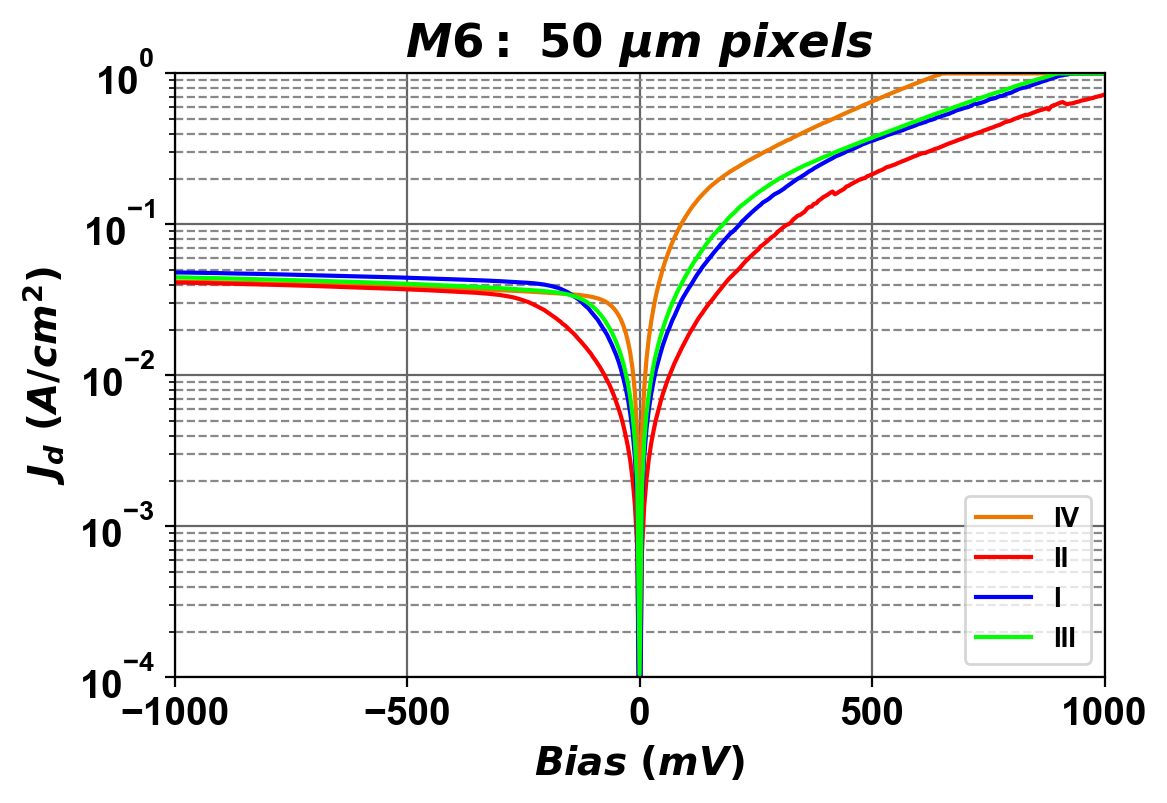

In [221]:
indI=[2,1,3,0]

cut = lambda a,indList:[a[i] for i in range(len(a)) if i in indI]
cdic = {'I':'#0000FF','II':'#FF0000','III':'#00FF00','IV':'#EE7700'}

for x,d,fname in zip(cut(X,inds),cut(data,inds),cut(s,inds)):
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    quad = fname.split('\\')[-1].split(' ')[3].split('0')[0]
    plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,color=cdic[quad],label=quad)
    if quad == 'I':
        np.savetxt('M6_50_QI.data',np.array([V,I]).transpose())

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#888888', linestyle='--')

plt.legend(loc='best',prop={'size':10})
plt.legend(loc='lower right',prop={'size':10})


plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$J_{d}\ (A/cm^2)$')
plt.title('$%s:\ 50\ \mu m\ pixels$'%sname)
plt.xlim(-1000,1000)
plt.ylim(1E-4,1E0)
#plt.xlim(-1000,0)
#plt.semilogy([-1000,1000],[1E-2,1E-2],'k--')
#plt.ylim(0,1E-1)

(1e-05, 1.0)

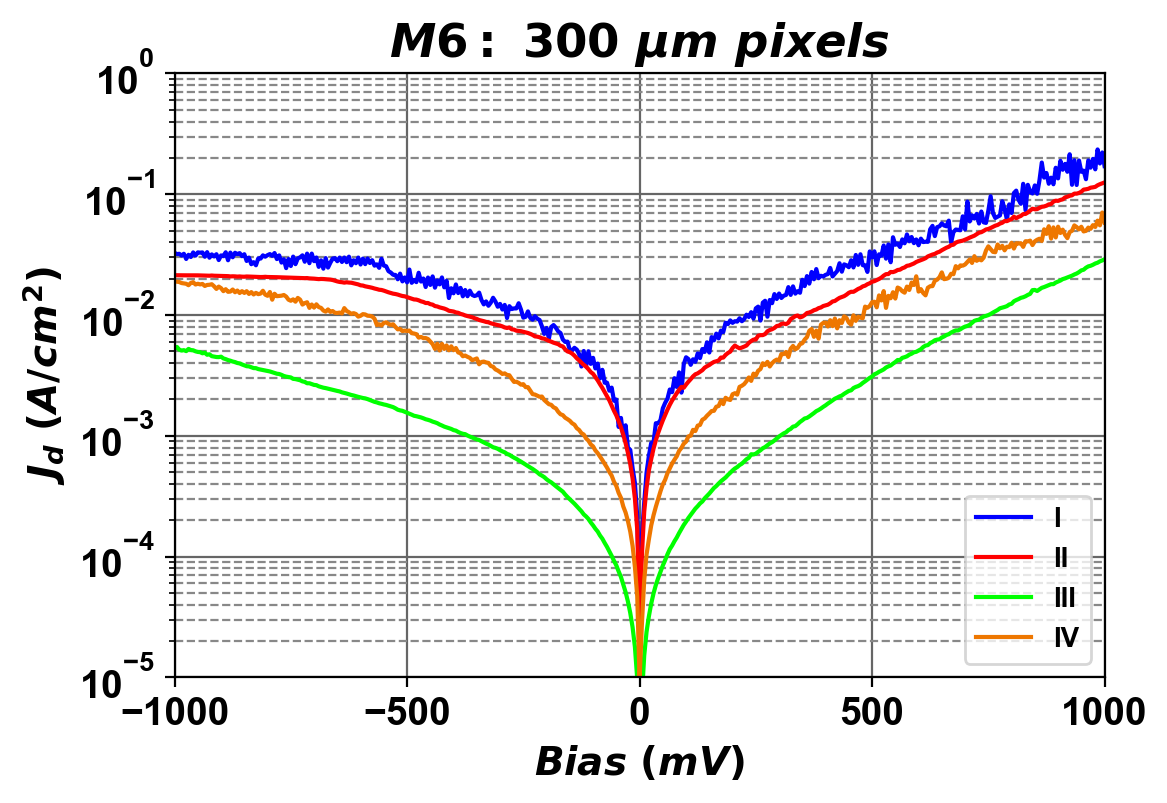

In [114]:
indI=[11,13,14,17]

cut = lambda a,indList:[a[i] for i in range(len(a)) if i in indI]
cdic = {'I':'#0000FF','II':'#FF0000','III':'#00FF00','IV':'#EE7700'}

for x,d,fname in zip(cut(X,inds),cut(data,inds),cut(s,inds)):
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    quad = fname.split('\\')[-1].split(' ')[3].split('0')[0]
    plt.semilogy(V*1E3,np.abs(I)/(x*1E-4)**2,color=cdic[quad],label=quad)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#888888', linestyle='--')

plt.legend(loc='best',prop={'size':10})
plt.legend(loc='lower right',prop={'size':10})


plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$J_{d}\ (A/cm^2)$')
plt.title('$%s:\ 300\ \mu m\ pixels$'%sname)
plt.xlim(-1000,1000)
plt.ylim(1E-5,1E0)
#plt.xlim(-1000,0)
#plt.semilogy([-1000,1000],[1E-2,1E-2],'k--')
#plt.ylim(0,1E-1)

In [141]:
def getJf(d,x):
    f = interp1d(d['Voltage_(V)'],d['Current_(A)']/(x*1E-4)**2,kind='cubic')
    return f

def fitR(R):

    Jd300 = getJf(data[17],X[17])
    Jd100 = getJf(data[8],X[8])

    V = np.linspace(-1,1,1000)

    Vb = np.vectorize(lambda V,Jdf,R: V-Jdf(V)*R if abs(Jdf(V)*R)<abs(V) else np.NaN)

    plt.semilogy(V*1E3,abs(Jd100(V)),'b',label='$100\ \mu m$')
    plt.semilogy(V*1E3,abs(Jd300(V)),'k',label='$100\ \mu m$')
    try:
        plt.semilogy(Vb(V,Jd100,R)*1E3,abs(Jd300(Vb(V,Jd100,R))),'k',label='$R = %0.3e$'%R)
    except:
        pass


    plt.grid(b=True, which='major', color='#888888', linestyle='-')
    plt.grid(b=True, which='minor', color='#888888', linestyle='--')

    plt.legend(loc='best',prop={'size':10})
    plt.legend(loc='lower right',prop={'size':10})


    plt.xlabel('$Bias\ (mV)$')
    plt.ylabel('$J_{d}\ (A/cm^2)$')
    plt.title(sname+': Quad IV')
    plt.xlim(-1000,1000)
    plt.ylim(1E-4,1E0)
    plt.show()
    
doIT(fitR,R=10)

Widget Javascript not detected.  It may not be installed or enabled properly.


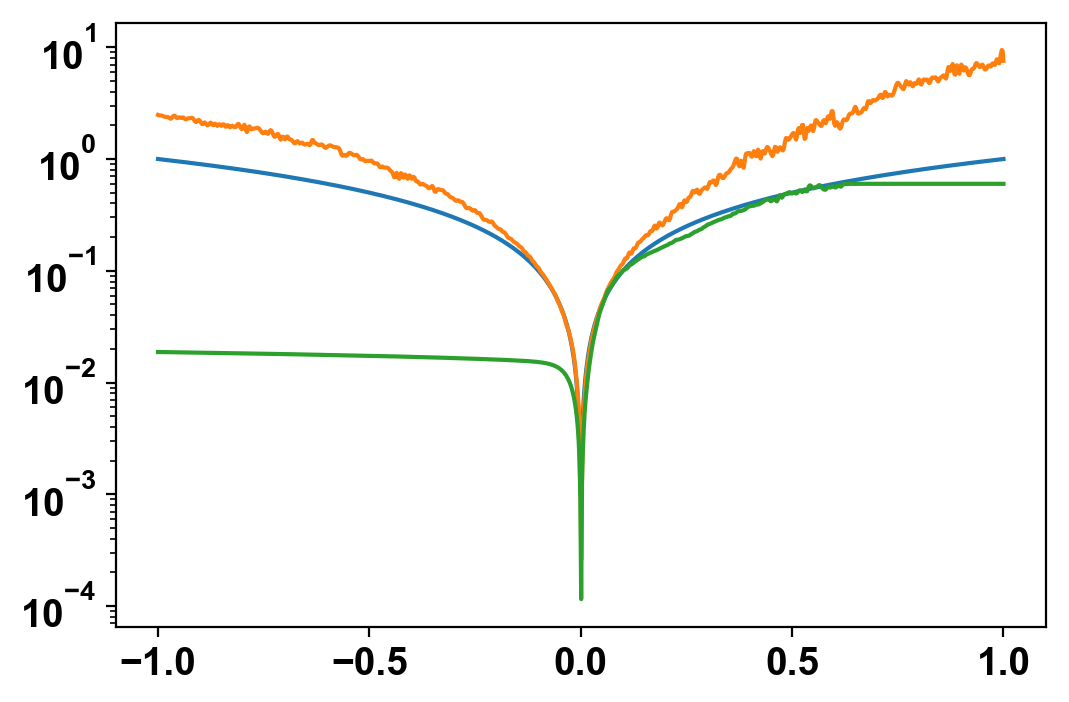

In [168]:
Jd100 = getJf(data[8],X[8])
Jd300 = getJf(data[17],X[17])
V = np.linspace(-1,1,1000)

plt.semilogy(V,abs(V))
plt.semilogy(V,abs(Jd300(V))*130)
plt.semilogy(V,abs(Jd100(V))*.6)
#plt.semilogy(V-Jd300(V)*130,abs(Jd300(V)))

#Vb = np.vectorize(lambda V,Jdf,R: V-Jdf(V)*R if abs(Jdf(V)*R)<abs(V) else np.NaN)

(-0.004, 0.004)

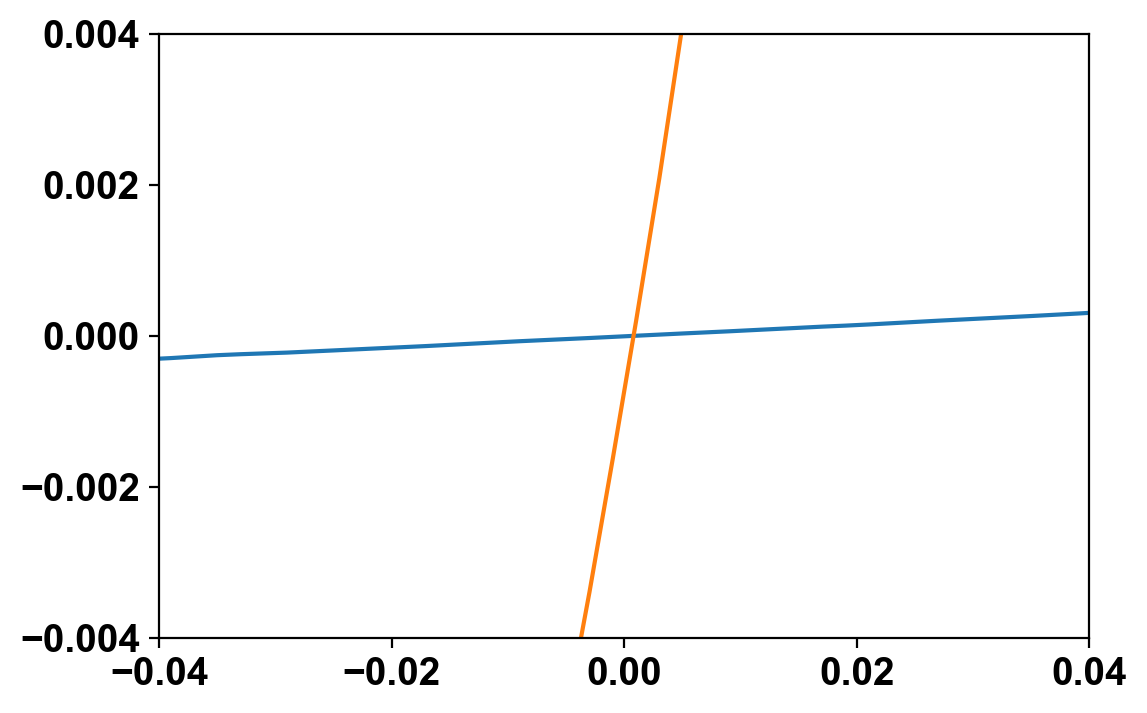

In [185]:
Jd100 = getJf(data[8],X[8])
Jd300 = getJf(data[17],X[17])
V = np.linspace(-1,1,1000)

#plt.semilogy(V,abs(V))
plt.plot(V,Jd300(V))
plt.plot(V,Jd100(V))

plt.xlim(-.04,.04)
plt.ylim(-.004,.004)

#plt.semilogy(V-Jd300(V)*130,abs(Jd300(V)))

#Vb = np.vectorize(lambda V,Jdf,R: V-Jdf(V)*R if abs(Jdf(V)*R)<abs(V) else np.NaN)

(0.43889355479619335, -0.49309653595393305)
(0.52916020956823617, -0.13545479883592168)
(10.206641492017537, -0.0406752275848326)


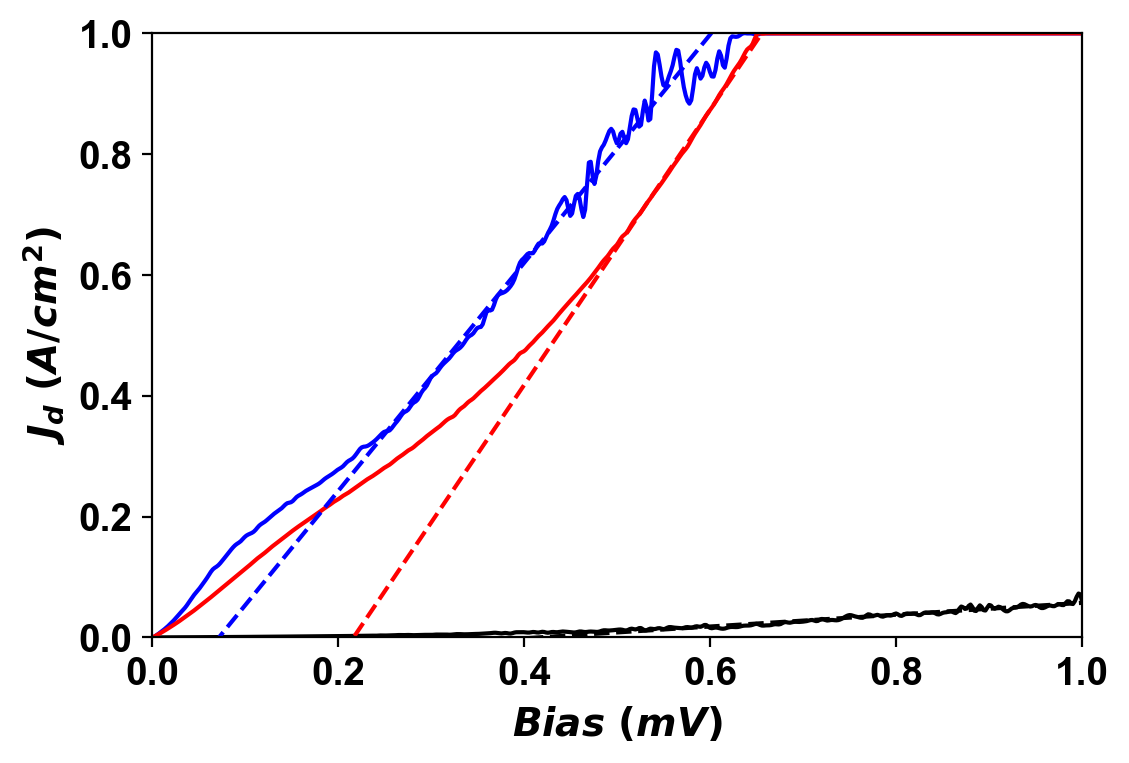

In [216]:
Jd50 = getJf(data[0],X[0])
Jd100 = getJf(data[8],X[8])
Jd300 = getJf(data[17],X[17])


V = np.linspace(-1,1,1000)
V50 =np.linspace(.5,.63,100)
V100=np.linspace(.3,.6,100)
V300=np.linspace(.5,1,100)

f50 = np.poly1d(np.polyfit(V50,Jd50(V50),1))
f100 = np.poly1d(np.polyfit(V100,Jd100(V100),1))
f300 = np.poly1d(np.polyfit(V300,Jd300(V300),1))


#plt.semilogy(V,abs(V))
plt.plot(V,Jd300(V),'k')
plt.plot(V,Jd100(V),'b')
plt.plot(V,Jd50(V),'r')


plt.plot(V,f50(V),'r--')
plt.plot(V,f100(V),'b--')
plt.plot(V,f300(V),'k--')


print(1/f50.c[0],f50.c[1])
print(1/f100.c[0],f100.c[1])
print(1/f300.c[0],f300.c[1])

plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$J_{d}\ (A/cm^2)$')

#plt.semilogy(V-Jd300(V)*130,abs(Jd300(V)))

#Vb = np.vectorize(lambda V,Jdf,R: V-Jdf(V)*R if abs(Jdf(V)*R)<abs(V) else np.NaN)

      3         2
2.68 x - 1.389 x + 1.339 x - 0.00804
        3         2
-1.125 x + 1.768 x + 0.953 x + 0.02807
           3           2
0.0009299 x + 0.06939 x - 0.01212 x + 0.001252


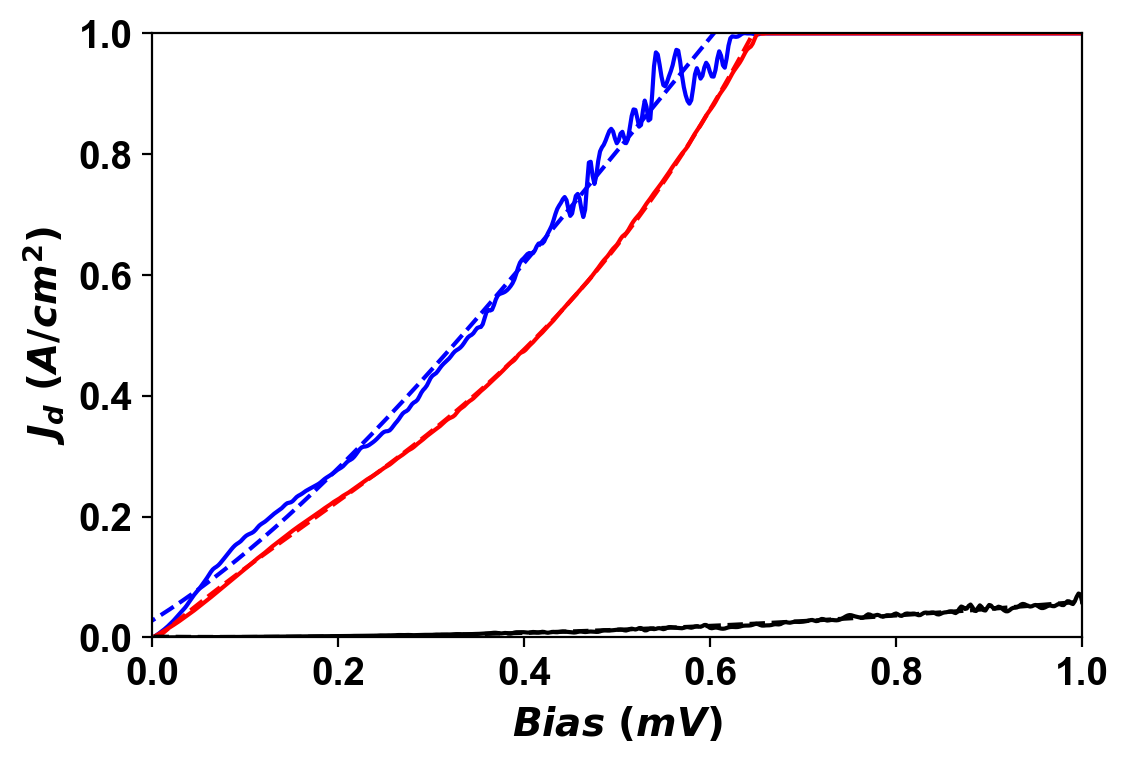

In [217]:
Jd50 = getJf(data[0],X[0])
Jd100 = getJf(data[8],X[8])
Jd300 = getJf(data[17],X[17])


V = np.linspace(-1,1,1000)
V50 =np.linspace(0,.63,100)
V100=np.linspace(0,.6,100)
V300=np.linspace(0,1,100)

n = 3
f50 = np.poly1d(np.polyfit(V50,Jd50(V50),n))
f100 = np.poly1d(np.polyfit(V100,Jd100(V100),n))
f300 = np.poly1d(np.polyfit(V300,Jd300(V300),n))


#plt.semilogy(V,abs(V))
plt.plot(V,Jd300(V),'k')
plt.plot(V,Jd100(V),'b')
plt.plot(V,Jd50(V),'r')


plt.plot(V,f50(V),'r--')
plt.plot(V,f100(V),'b--')
plt.plot(V,f300(V),'k--')


print(f50)
print(f100)
print(f300)

plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('$Bias\ (mV)$')
plt.ylabel('$J_{d}\ (A/cm^2)$')

#plt.semilogy(V-Jd300(V)*130,abs(Jd300(V)))


<h3>Symetry

In [14]:
def plotSym(i):
    x,d = X[i],data[i]
    c = {50:'r',100:'b',300:'k',}
    I = np.array(d['Current_(A)']).astype(float)
    V = np.array(d['Voltage_(V)']).astype(float)
    I = (np.abs(I)-np.abs(I[::-1]))/np.abs(I)
    plt.semilogy(V[int(len(V)/2):]*1E3,np.abs(I[int(len(I)/2):]),c[x])
    plt.title('i: %s'%i)
    plt.show()

doIT(plotSym,i=(0,len(data)-1))

Widget Javascript not detected.  It may not be installed or enabled properly.
